# Seaborn

In [1]:
import seaborn as sns 

In [2]:
%matplotlib inline

* 1 Load Data 

In [4]:
tips = sns.load_dataset('tips') #Inbuilt dataset for seaborn
                                #SYNTAX(To load) : sns.load_dataset('Name')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1)  Distribution Plots

### A-1)Distplot

* SYNTAX: sns.distplot(ds_name['col_name'], kde= T/F, bins= value) 
    * To check how that Particular Column is distributed
    * Bins = No. of records
    * kde = Kernal Density estimation


D:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

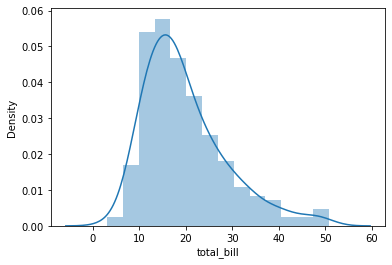

In [7]:
sns.distplot(tips['total_bill']) #Result: Kernal Density Estimation graph

<AxesSubplot:xlabel='total_bill'>

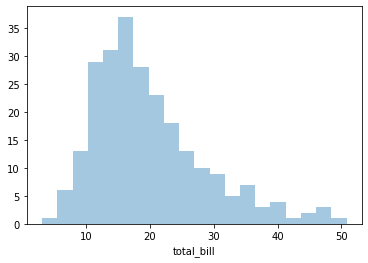

In [9]:
#Removing KDE and Specify Bins
sns.distplot(tips['total_bill'], kde=False, bins=20)

### A-2) Joint Plot

* SYNTAX: sns.jointplot(x = 'col_1',y = 'col_2', data = ds_name, kind = 'Plot_type')
    * Plot_type = hex, reg, kde
    * Used to join two distribution plots || x,y will have 2 name whose distribution is to be joined

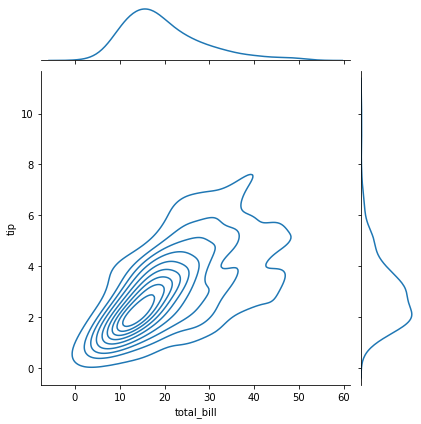

In [15]:
#2) Joinplots
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind= 'kde')

In [16]:
#Result: There is a trend in scatter plot that says as you higher in bill you go higher in tip as well.

### A-3) Pair plot
* SYNTAX: sns.pairplot(ds_name, hue='cat_col_name',palette = 'color_type')
    * Performs joint plot for every single combination in the Dataframe
    * hue | is for Categorical col.( with 2 options) || Colors them in all the pairplots

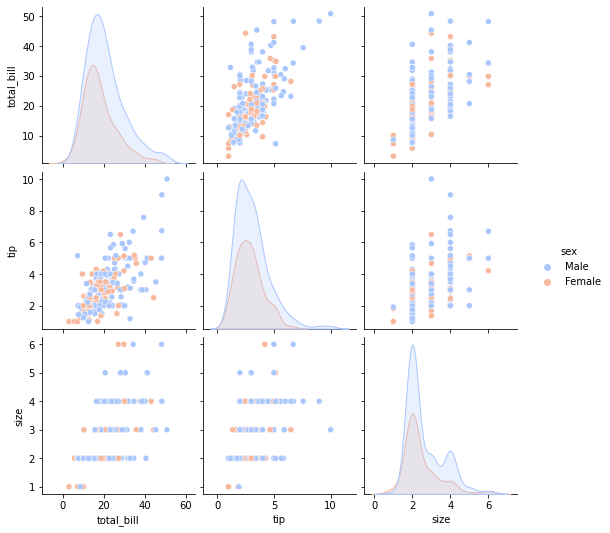

In [17]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm')

### A-4) Rug Plot (Part of KDE)
* SYNTAX: sns.rugplot(ds_name['col_name'])
    * Shows dashes|| for  || Overall dashes of bins in distplot

<AxesSubplot:xlabel='total_bill'>

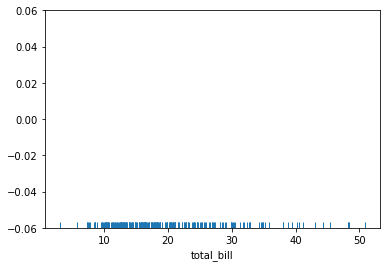

In [18]:
sns.rugplot(tips['total_bill'])

### A-5) KDE plots
* SYNTAX: sns.kde(ds_name['col_name'])

In [20]:
#1) Write a intensive code for KDE

(0.0, 1.0)

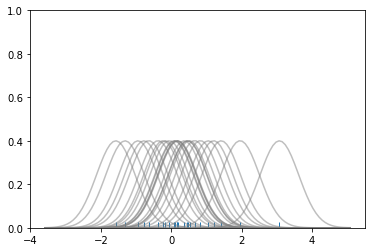

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

In [22]:
#2) Sumup all these

Text(0.5, 0.98, 'Sum of the Basis Functions')

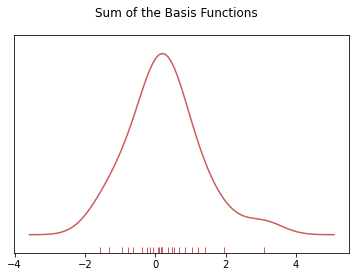

In [24]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

## 2) Categorical Plots

In [25]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### B-1)Bar plots(Viz. of "group by")
* SYNTAX: sns.barplot(x= 'cat_col_name',y='num_col_name',data=ds_name, estimator = np.fun)
    * provides aggregate data of a categorical col
    * estimator | helps in changing the default estimation(mean) to any Numpy function

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

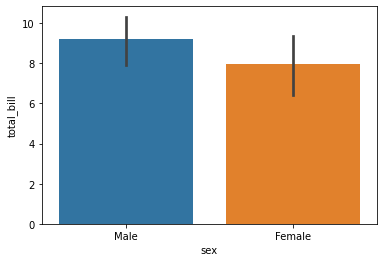

In [26]:
import numpy as np
sns.barplot( x='sex', y='total_bill', data=tips, estimator=np.std)

### B-2)Count Plots
* SYNTAX: sns.countplot(x = 'cat-col_name', data = ds_name)
    * Same as Barplot, but counts the occurences instead of aggregate fun

<AxesSubplot:xlabel='sex', ylabel='count'>

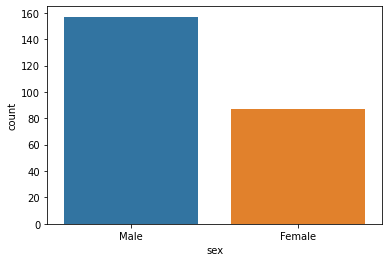

In [29]:
sns.countplot(x='sex',data = tips)

### B-3) Box Plot
* SYNTAX: sns.boxplot(x = 'cat_col_name', y = 'num_col_name', data = tips, hue = 'splitter_col')
    * HUE in boxplot, splits the plot based on the col
    * Points apart from Whiskers are OUTLIERS

<AxesSubplot:xlabel='day', ylabel='total_bill'>

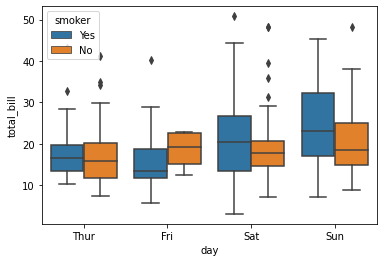

In [30]:
sns.boxplot(x='day',y='total_bill',data = tips, hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

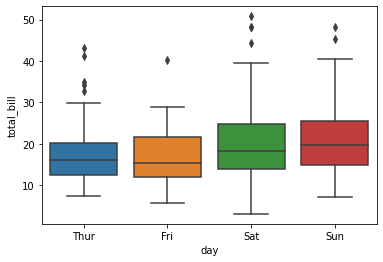

In [31]:
sns.boxplot(x='day',y='total_bill',data = tips)

### B-4) Violin Plot
* SYNTAX: sns.violinplot(x = 'cat_col_name', y = 'num_col_name', data = tips, hue = 'splitter_col',split=T/F)
    * Similar to Boxplot, just + KDE (shown)
    * Hard to read
    * Split || divides the violin plot in half with0out drawing other Violin plots for splitter_col

<AxesSubplot:xlabel='day', ylabel='total_bill'>

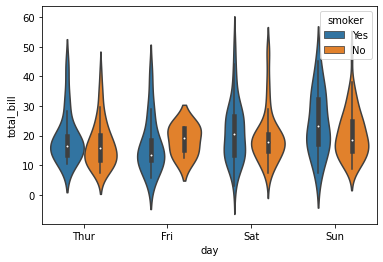

In [33]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

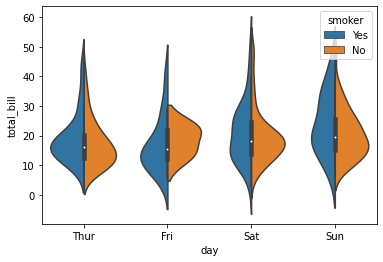

In [34]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True)

### B-5) Stripplot
* SYNTAX: sns.striplot(x='cat_col', y='num_col', data = ds_name, jitter=T/F, hue='splitter_col',split=T/F)
    * Makes scatter plot in Strip
    * Limit: Cant read nos. of stacked points on top >> Use ' Jitter'

D:\Softwares\Anaconda3\lib\site-packages\seaborn\categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

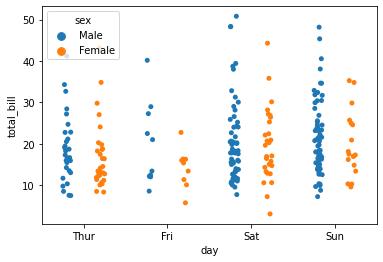

In [38]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True, hue='sex',split=True)

## > Special: Swarmplot(Stripplot+violinplot)
* SYNTAX: sns.swarmplot(x='cat_col',y='num_col',data=ds_name)
    * LIMIT: No use for largedatasets
    * Use SWARM + Violin plot  Simulataneously || Add color='color_name' ||(Good practice)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

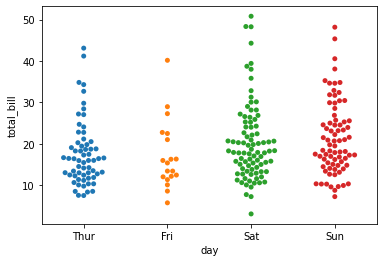

In [39]:
sns.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

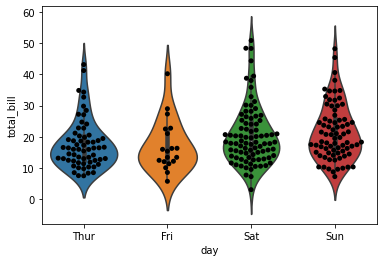

In [41]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips, color='black')

### >> General Categorical Plot( FACTOR PLOT)
* SYNTAX: sns.factorplot(x='cat_col',y='num_col',data=ds_name, kind='plot_type')
    * kind = violin,scatter,box,bar......

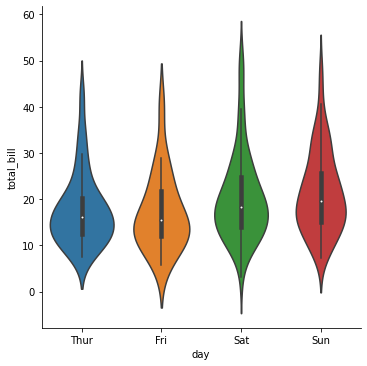

In [45]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='violin')

# 3) Matrix Plots

In [47]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## C-1) HEATMAP
* SYNTAX: sns.heatmap(matrix_name ,annot=T/F, cmap = 'color_type',linecolor = 'color_name', linewidths = value)
* SYNTAX(Form Matrix) Using:  .corr() / .pivot_table(index=, columns=, values=) /
    * (UNSTACK METHOD) .groupby(by=['cols']).count()['col'].unstack()
* NOTE: Basic Matrix plot = HEATMAP
    * For Heatmap: Data should already be in Matrix Form || Index name and col. name should match up so that the cell value 
    * Indicates something that is relevant to both the values = Correlation / Pivot Table
    * Annot || labels nuerical value on the heatmap
    * cmap || colormap

In [56]:
#1 Using Tips data
tc = tips.corr()

<AxesSubplot:>

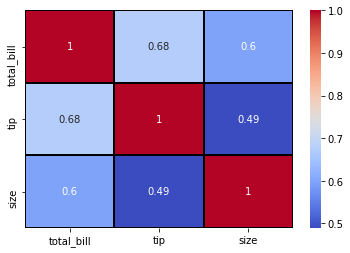

In [65]:
sns.heatmap(tc,annot=True,cmap='coolwarm',linecolor = 'black', linewidths = 1)

In [58]:
#2 Using and converting flights dataset to Matrix (Using Pivot)

In [59]:
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [62]:
fpt = flights.pivot_table(index='month',columns='year',values='passengers') #To form Matrix
fpt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

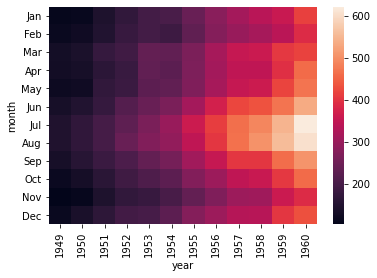

In [64]:
sns.heatmap(fpt)

## C-2) Cluster Map
* SYNTAX: sns.clustermap(matrix_name, cmap= ' color_name', standard_scale = value )
    * standard_scale is to set the scale value in standarized manner

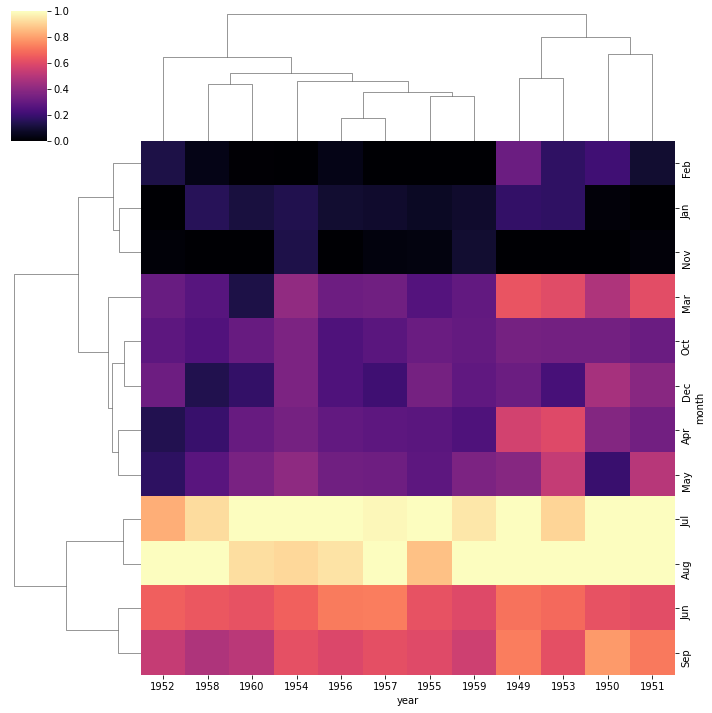

In [67]:
sns.clustermap(fpt,cmap = 'magma', standard_scale = 1)

# 4) Grids





In [68]:
import seaborn as sns 
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## D-1) PairGrid
#### PairGrid splits the entire Dataset w/0 any Reference
* SYNTAX(1): var =  sns.PairGrid(ds_name)
* SYNTAX(2): var.map(plt.plot_type)
            * var.map_diag(sns.plot_type) #For Seaborn plot type
            * var.map_lower(sns.ploy_type)
            * var.map_upper(plt.plot_type)
            
    *  Used when CUSTOMIZABLE plots requires
    * Assign the code to a variable || Map the variable
    * PairGrid has way more control over the graph pairs
    * sns = use for seaborn plots ||plt=use for normal plots > Decides seperate graphs on lower,upper,diagonal parts of the plot
    * It turns the "pairplot" values >> saves them in to "gridformat"

D:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

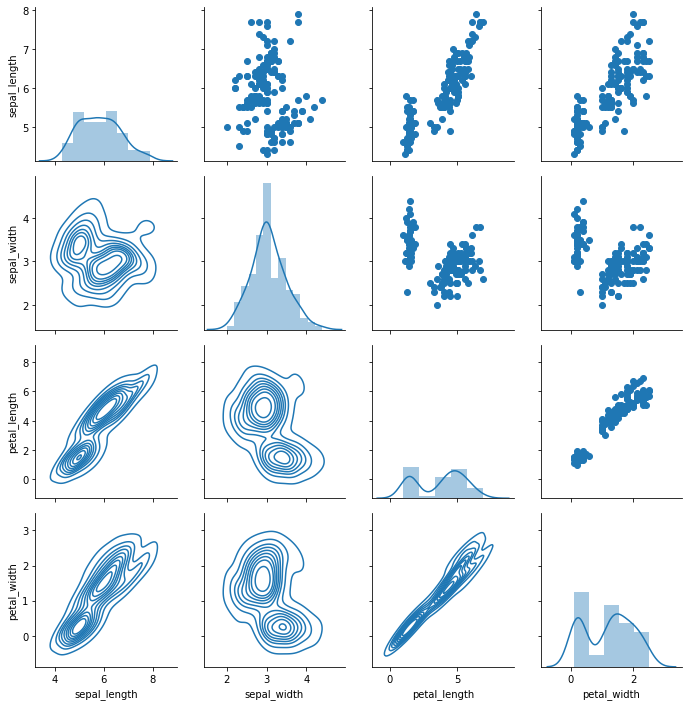

In [73]:
PG = sns.PairGrid(iris)
PG.map_diag(sns.distplot)
PG.map_upper(plt.scatter)
PG.map_lower(sns.kdeplot)

## D-2) Facet Grid
#### Splits the dataset with Reference to |(col.) |(row)
* SYNTAX(1): var = sns.FacetGrid(data = ds_name, col = 'ref_col_name', row = 'ref_row_name')
* SYNTAX(2): var.map(sns/plt.plot_name, 'ext_col_1','ext_col_2')
    *ext_col | depends on output required.
    
    * FacetGrid splits the plots in reference with row & column
    * Assign code to a variable


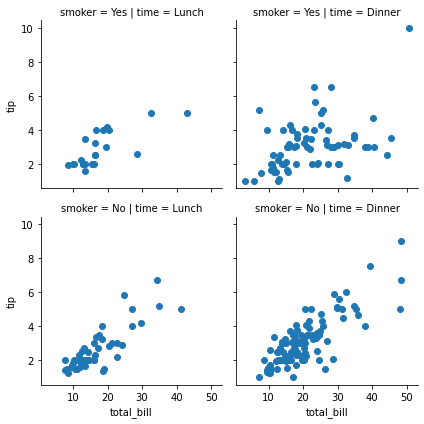

In [75]:
tfg = sns.FacetGrid(tips, col = 'time', row= 'smoker' )
tfg.map(plt.scatter, 'total_bill', 'tip')

# E) Regression Plot(lm)

* SYNTAX: sns.lmplot(x = 'col_name', y = 'col_name', data = ds_name, col = 'col_name', row = 'col_name', hue = 'col_name',
                     aspect = value, size = value)
    * col & row can represent lmplot w.r.t. it's col_name 
    * aspect = height:width

In [ ]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()


In [ ]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


D:\Softwares\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


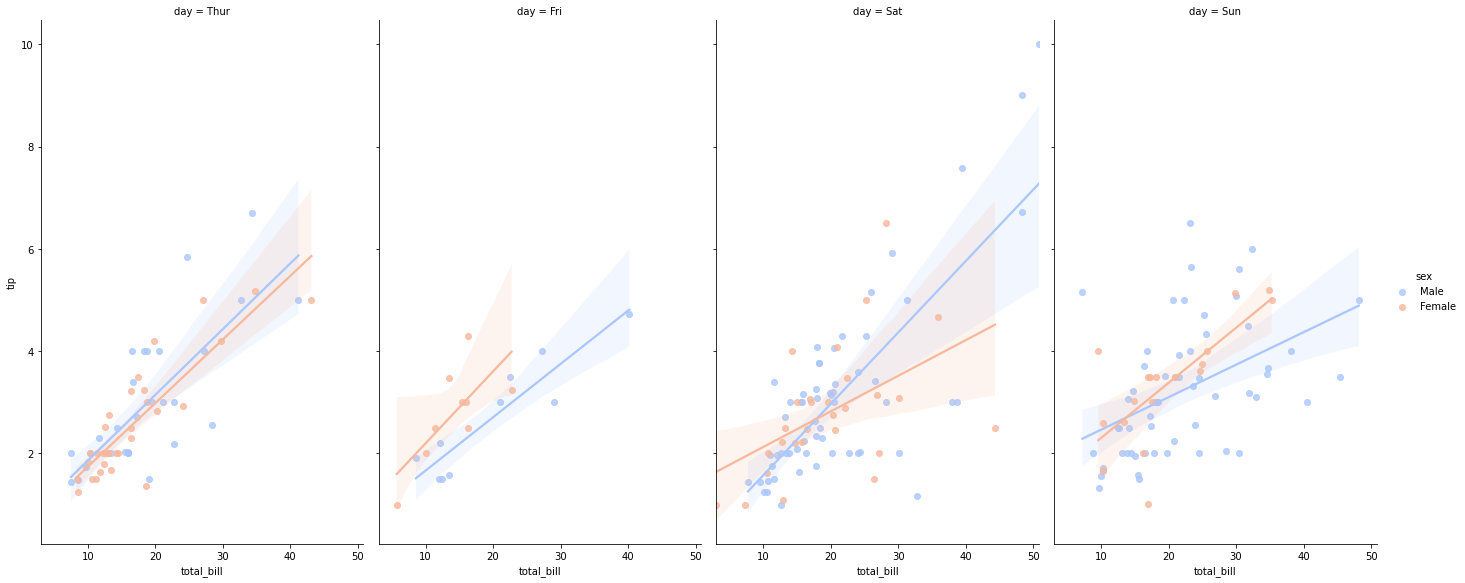

In [10]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

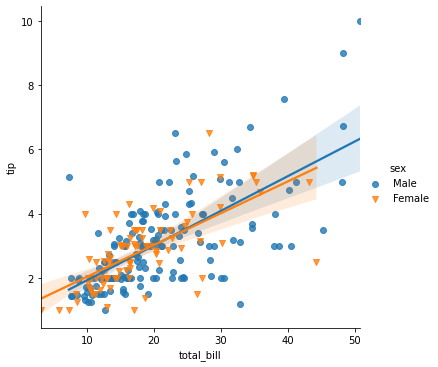

In [11]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'])

# F) Style & Color

In [20]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### F-1) Set Style

* SYNTAX: sns.set_style('dark grid'/'white grid'/'dark'/'white'/'ticks')
    * To change background of the graph

<AxesSubplot:xlabel='sex', ylabel='count'>

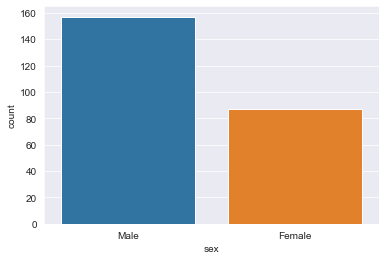

In [21]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

### F-2) Spine Removal || Only left spine
* SYNTAX: sns.despine()
* Syntax: sns.despine(left=True)
    * Spine = ticks or box lines

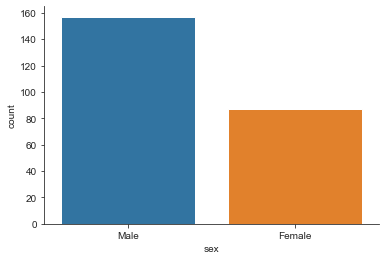

In [23]:
sns.set_style('ticks')
sns.countplot(x = 'sex',data=tips)
sns.despine()


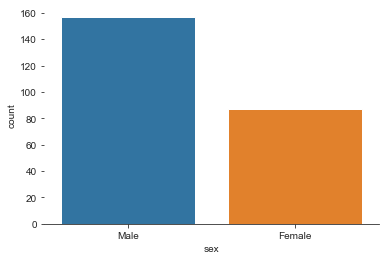

In [24]:
sns.set_style('ticks')
sns.countplot(x = 'sex',data=tips)
sns.despine(left=True)


### F-3) Size and Aspect

* SYNTAX: plt.figure(figsize=(width,height)

AttributeError: module 'seaborn' has no attribute 'puppyplot'